In [1]:
#law of large numbers which states that the ratio of something gets closer to its probability as you increase the number 

In [104]:
#libraries


from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from pathlib import Path
from sklearn.ensemble import StackingClassifier
import tarfile
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%matplotlib inline

In [3]:
np.random.rand(10 , 10)

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
        0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
       [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
        0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041],
       [0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
        0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249],
       [0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
        0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446],
       [0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
        0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033],
       [0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
        0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694],
       [0.77224477, 0.19871568, 0.0055221

In [4]:
yeah = (np.random.rand(10 , 10)<0.51).astype(np.int32)
yeah


array([[1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
       [1, 1, 1, 1, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0]], dtype=int32)

In [5]:
np.cumsum(yeah)

array([ 1,  1,  2,  3,  3,  4,  5,  5,  6,  7,  8,  9,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 11, 12, 13, 14, 14, 14, 15, 15, 16, 17, 18, 19,
       19, 20, 20, 20, 21, 21, 21, 22, 23, 24, 25, 26, 26, 27, 28, 29, 29,
       30, 31, 32, 32, 33, 33, 33, 34, 34, 35, 35, 35, 35, 36, 36, 37, 38,
       39, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 45, 46, 46, 46, 47,
       47, 47, 47, 47, 48, 49, 49, 49, 49, 50, 51, 51, 51, 51, 51])

In [6]:
np.cumsum(yeah)/np.arange(1 , 101)

array([1.        , 0.5       , 0.66666667, 0.75      , 0.6       ,
       0.66666667, 0.71428571, 0.625     , 0.66666667, 0.7       ,
       0.72727273, 0.75      , 0.69230769, 0.64285714, 0.6       ,
       0.5625    , 0.52941176, 0.55555556, 0.52631579, 0.5       ,
       0.47619048, 0.45454545, 0.47826087, 0.5       , 0.52      ,
       0.53846154, 0.51851852, 0.5       , 0.51724138, 0.5       ,
       0.51612903, 0.53125   , 0.54545455, 0.55882353, 0.54285714,
       0.55555556, 0.54054054, 0.52631579, 0.53846154, 0.525     ,
       0.51219512, 0.52380952, 0.53488372, 0.54545455, 0.55555556,
       0.56521739, 0.55319149, 0.5625    , 0.57142857, 0.58      ,
       0.56862745, 0.57692308, 0.58490566, 0.59259259, 0.58181818,
       0.58928571, 0.57894737, 0.56896552, 0.57627119, 0.56666667,
       0.57377049, 0.56451613, 0.55555556, 0.546875  , 0.55384615,
       0.54545455, 0.55223881, 0.55882353, 0.56521739, 0.55714286,
       0.54929577, 0.55555556, 0.54794521, 0.55405405, 0.54666

In [7]:
np.cumsum(yeah)/np.arange(1,101).reshape(-1 , 1)

array([[1.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        5.10000000e+01, 5.10000000e+01, 5.10000000e+01],
       [5.00000000e-01, 5.00000000e-01, 1.00000000e+00, ...,
        2.55000000e+01, 2.55000000e+01, 2.55000000e+01],
       [3.33333333e-01, 3.33333333e-01, 6.66666667e-01, ...,
        1.70000000e+01, 1.70000000e+01, 1.70000000e+01],
       ...,
       [1.02040816e-02, 1.02040816e-02, 2.04081633e-02, ...,
        5.20408163e-01, 5.20408163e-01, 5.20408163e-01],
       [1.01010101e-02, 1.01010101e-02, 2.02020202e-02, ...,
        5.15151515e-01, 5.15151515e-01, 5.15151515e-01],
       [1.00000000e-02, 1.00000000e-02, 2.00000000e-02, ...,
        5.10000000e-01, 5.10000000e-01, 5.10000000e-01]], shape=(100, 100))

In [8]:
# basically now we gonna plot the head ratio to show the law of large number 

In [9]:
probaility_of_head = 0.51
coin_tosses  = (np.random.rand(10000 , 10) < probaility_of_head).astype(np.int32)

In [10]:
#head ration form the cumulative head

cumulative_head = np.cumsum(coin_tosses , axis=0)/np.arange(1 , 10001).reshape(-1 , 1)

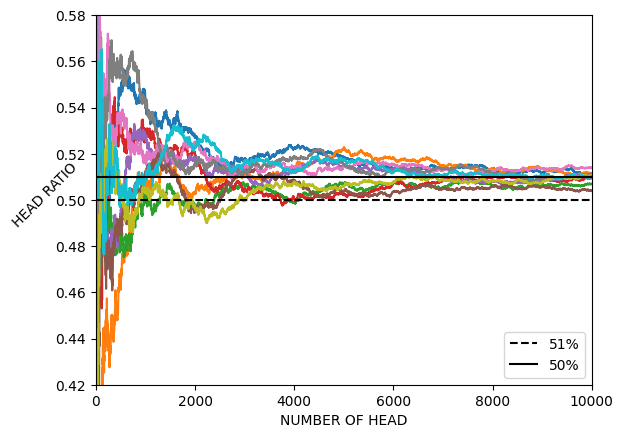

In [11]:
plt.plot(cumulative_head)
plt.axis([0 , 10000 , 0.42 , 0.58] )
plt.plot([0 , 10000] , [0.50 , 0.50] , "k--" , label="51%")
plt.plot([0, 10000] , [0.51 , 0.51] , "k-" , label="50%")
plt.legend(loc="lower right")
plt.xlabel("NUMBER OF HEAD" , fontsize = 10)
plt.ylabel("HEAD RATIO" , fontsize=10 , rotation=45)
plt.show()

In [12]:
x , y = make_moons(n_samples = 500 , noise=0.30 , random_state=42)
x_train , x_test , y_train , y_test = train_test_split(x  , y , random_state=42)

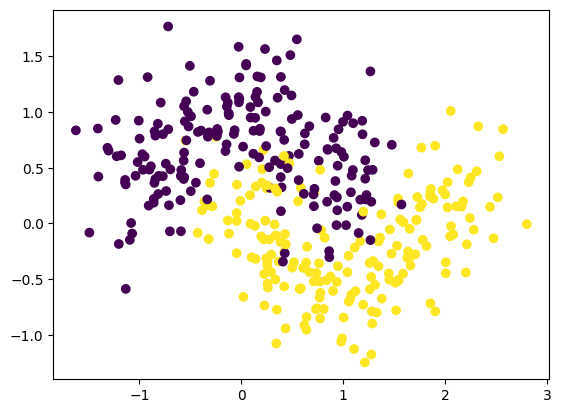

In [13]:
plt.scatter(x_train[: , 0] , x_train[: , 1] , c=y_train)
plt.show()

#dear make moons 

In [14]:
#models

log_clf = LogisticRegression()
random_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
  estimators= [("log clf" , log_clf),  ("random forsest" , random_clf),    ("svm clf" , svm_clf)],
    voting='hard')
       

voting_clf.fit(x_train , y_train)

,estimators,"[('log clf', ...), ('random forsest', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [15]:
#lets check each calssifier indv accuracy

for clf in (log_clf ,  random_clf , svm_clf , voting_clf):
    clf.fit(x_train , y_train)
    y_pred = clf.predict(x_test)
    print(f"{clf.__class__.__name__}  {accuracy_score(y_test , y_pred)}" )

LogisticRegression  0.864
RandomForestClassifier  0.88
SVC  0.896
VotingClassifier  0.888


In [16]:
def plot_(model, x , y):
    x1 = np.linspace(-1.5 , 2 , 100)
    x2 = np.linspace(-1 , 1.5 , 100)
    x1_grid , x2_grid = np.meshgrid(x1 , x2)
    x_final = np.c_[x1_grid.ravel() , x2_grid.ravel()]
    print(x1_grid.shape)
    
    y_pred = model.predict(x_final).reshape(x1_grid.shape)
    plt.scatter(x[: , 0] , x[: , 1] , c=y , cmap="coolwarm")
    plt.contourf(x1_grid , x2_grid , y_pred ,  alpha = 0.3 , cmap="winter")
    plt.axis([-1.5, 2 , -1 , 1.5])
    


(100, 100)


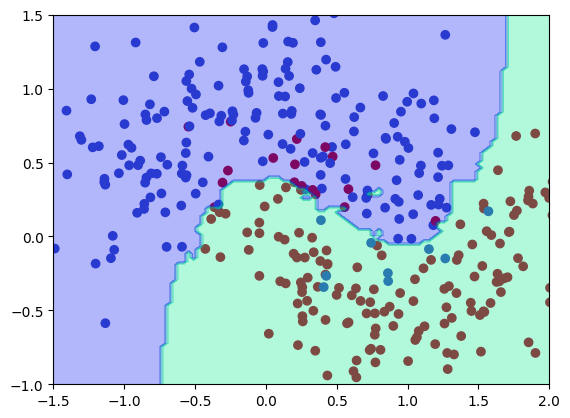

In [17]:
    
plot_(voting_clf , x_train , y_train)

(125, 125)


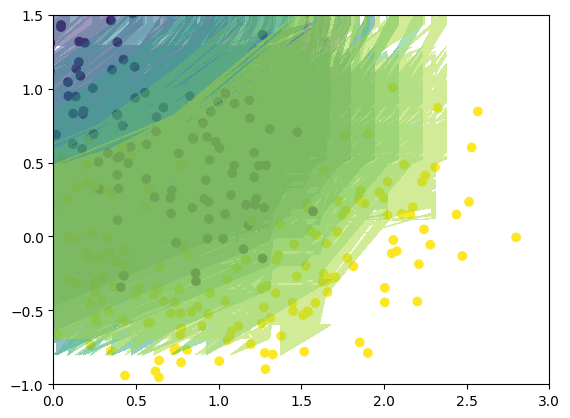

In [18]:
def plot(model, x , y , x_final , y_final):
    
    x1 = x_final[: , 0]
    x2 = x_final[: , 1]
    x1_grid , x2_grid = np.meshgrid(x1 , x2)
    x_final = np.c_[x1_grid.ravel() , x2_grid.ravel()]
    print(x1_grid.shape)
    
    y_pred = model.predict(x_final).reshape(x1_grid.shape)
    plt.scatter(x[: , 0] , x[: , 1] , c=y)
    plt.contourf(x1_grid , x2_grid , y_pred , alpha = 0.3)
    plt.axis([0 , 3 , -1 , 1.5])
    plt.show()

plot(voting_clf , x_train , y_train , x_test , y_test)

In [19]:
log_clf = LogisticRegression()
random_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
  estimators= [("log clf" , log_clf),  ("random forsest" , random_clf),    ("svm clf" , svm_clf)],
    voting='soft')
       

voting_clf.fit(x_train , y_train)

,estimators,"[('log clf', ...), ('random forsest', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [20]:

for clf in (log_clf ,  random_clf , svm_clf , voting_clf):
    clf.fit(x_train , y_train)
    y_pred = clf.predict(x_test)
    print(f"{clf.__class__.__name__}  {accuracy_score(y_test , y_pred)}" )

LogisticRegression  0.864
RandomForestClassifier  0.896
SVC  0.896
VotingClassifier  0.912


<b><H1><u>BAGGING AND PASTING

basically training same algo for every predictor but train them on different random subsets of the training data

In [21]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier() , n_estimators=500 ,
    max_samples= 100 , bootstrap=True , n_jobs=-1)

bag_clf.fit(x_train , y_train)
y_pred = bag_clf.predict(x_test)
print(f"accuracy : {accuracy_score(y_test , y_pred)}")

accuracy : 0.92


In [22]:
tree = DecisionTreeClassifier()
tree.fit(x_train , y_train)

y_pred = tree.predict(x_test)
print(f"acccuracy : {accuracy_score(y_test , y_pred)}")

acccuracy : 0.84


(100, 100)


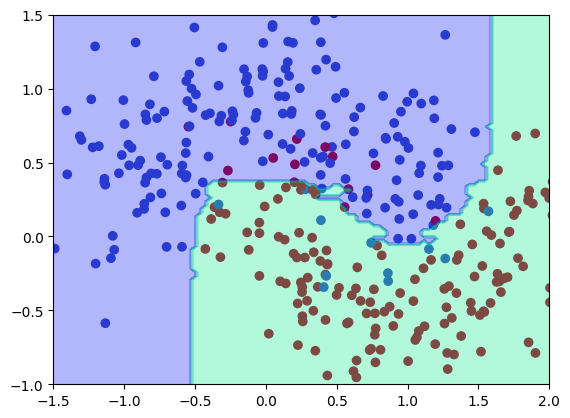

In [23]:
plot_(bag_clf , x_train , y_train)

(100, 100)


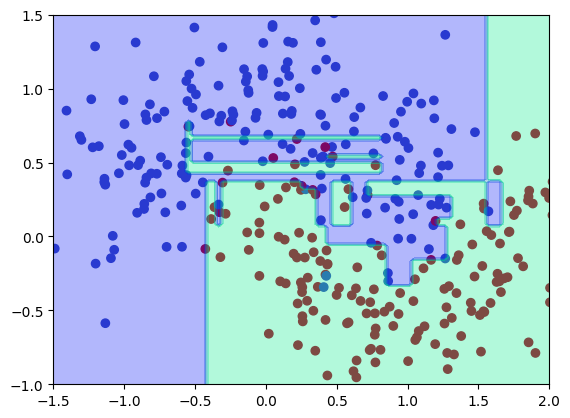

In [24]:
plot_(tree , x_train , y_train)

(100, 100)
(100, 100)


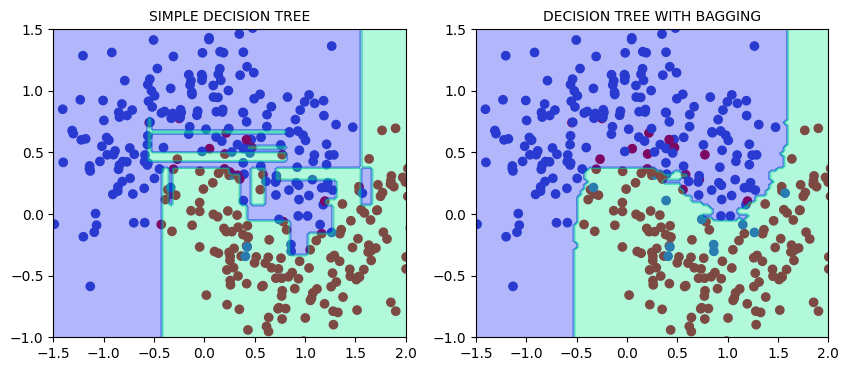

In [25]:
fig , axes = plt.subplots( 1 , 2 , figsize=(10,4))
plt.sca(axes[0])
plot_(tree , x_train , y_train)
plt.title("SIMPLE DECISION TREE" , fontsize=10)
plt.sca(axes[1])
plt.title("DECISION TREE WITH BAGGING" , fontsize=10)
plot_(bag_clf , x_train , y_train)
plt.show()

<b><h1>OUT OF BAG EVALUATION

In [26]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier() , n_estimators=500,
    bootstrap=True , n_jobs = -1 , oob_score=True
)

bag_clf.fit(x_train , y_train)
bag_clf.oob_score_

0.8986666666666666

In [27]:
y_pred = bag_clf.predict(x_test)
print(accuracy_score(y_test , y_pred))

0.88


(100, 100)


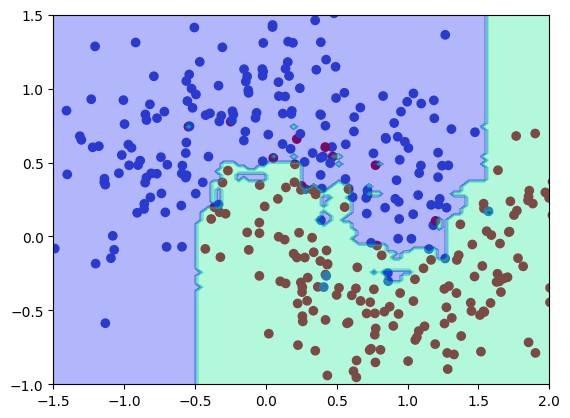

In [28]:
plot_(bag_clf , x_train , y_train)
plt.show()

In [29]:
bag_clf.oob_decision_function_

array([[0.39153439, 0.60846561],
       [0.33870968, 0.66129032],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.09550562, 0.90449438],
       [0.30366492, 0.69633508],
       [0.02061856, 0.97938144],
       [0.99473684, 0.00526316],
       [0.97368421, 0.02631579],
       [0.78865979, 0.21134021],
       [0.        , 1.        ],
       [0.77844311, 0.22155689],
       [0.85858586, 0.14141414],
       [0.98265896, 0.01734104],
       [0.04733728, 0.95266272],
       [0.        , 1.        ],
       [0.97883598, 0.02116402],
       [0.90697674, 0.09302326],
       [1.        , 0.        ],
       [0.03508772, 0.96491228],
       [0.35326087, 0.64673913],
       [0.92574257, 0.07425743],
       [0.99441341, 0.00558659],
       [0.97777778, 0.02222222],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64893617, 0.35106383],
       [0.

<b><h1>#RANDOM FOREST

In [30]:
random_forest_clf = RandomForestClassifier(n_estimators=500 , max_leaf_nodes=16 , n_jobs=-1)
random_forest_clf.fit(x_train , y_train)

y_pred = random_forest_clf.predict(x_test)

print(f"accuracy of the random forest on test data is {accuracy_score(y_test , y_pred)}")

accuracy of the random forest on test data is 0.92


In [31]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random" , max_leaf_nodes=16),
    n_estimators=500 , max_samples=1.0 , bootstrap=True , n_jobs=-1
)

bag_clf.fit(x_train , y_train)

,estimator,DecisionTreeC...tter='random')
,n_estimators,500
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,None
,verbose,0


In [32]:
y_pred = bag_clf.predict(x_test)
print(f"accuracy of the above model is {accuracy_score(y_test , y_pred)}")

accuracy of the above model is 0.912


(100, 100)
(100, 100)


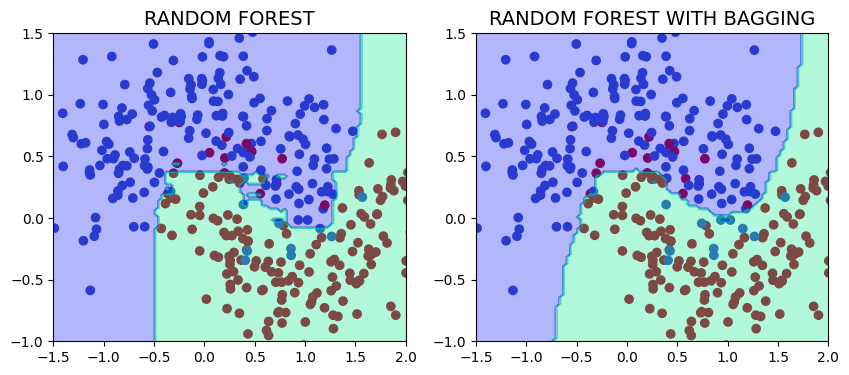

In [33]:
fig , axes = plt.subplots(1 , 2 , figsize=(10,4))
plt.sca(axes[0])
plot_(random_forest_clf , x_train , y_train)
plt.title("RANDOM FOREST" , fontsize=14)  
plt.sca(axes[1])
plot_(bag_clf , x_train , y_train)
plt.title("RANDOM FOREST WITH BAGGING" , fontsize=14)
plt.show()

In [34]:
#using random trees for feature importance


In [35]:
iris = load_iris()
random_clf = RandomForestClassifier(n_estimators=500 , n_jobs=-1)
random_clf.fit(iris['data'] , iris['target'])
for name , score in zip(iris['feature_names'] , random_clf.feature_importances_):
    print(name , score)

sepal length (cm) 0.0944839937222858
sepal width (cm) 0.02291859508354444
petal length (cm) 0.4316053195368105
petal width (cm) 0.4509920916573592


In [36]:
#feature importance on mnist

In [37]:
mnist = fetch_openml('mnist_784' , version=1)
x , y = mnist['data'] , mnist['target']

In [38]:
random_clf = RandomForestClassifier(n_estimators= 100 , random_state=42)
random_clf.fit(x , y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


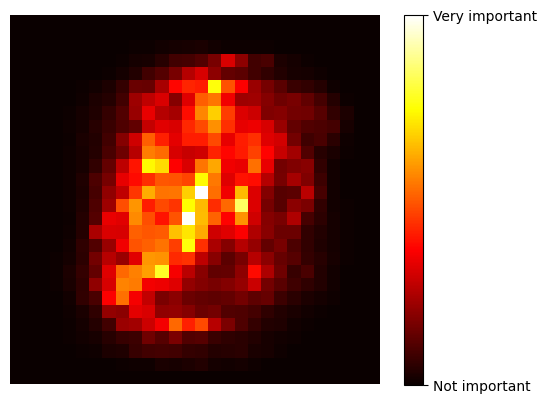

In [39]:
def function_name_idk(data):
    image = data.reshape(28 , 28)
    plt.imshow(image , cmap="hot" , interpolation="nearest")
    plt.axis("off")
    
function_name_idk(random_clf.feature_importances_)
cbar = plt.colorbar(ticks=[random_clf.feature_importances_.min(), random_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()


<h1><b><ulBOOSTING

<h1><b><u>BOOSTING

<h3><b><u>ADA BOOSTING

In [40]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1) , n_estimators=200,
    algorithm="SAMME" , learning_rate=0.5 , random_state=42
)

ada_clf.fit(x_train , y_train)


/home/ateeksh/mlrepos/mllibraries/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,200
,learning_rate,0.5
,algorithm,'SAMME'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


(100, 100)


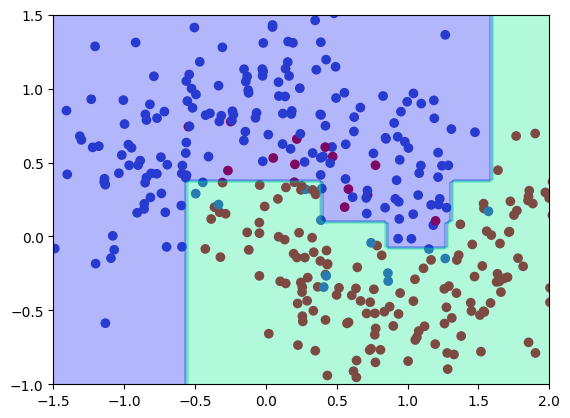

In [41]:
plot_(ada_clf , x_train , y_train)

<b><h1><u>GRADIENT BOOSTING 

In [79]:
m = 100
rng = np.random.default_rng(seed=42)
x = rng.random((m,1)) - 0.5
noise = 0.05 * rng.standard_normal(m)   #gaussian noise
y = 3 * x[: , 0] ** 2 + noise 

In [80]:
tree_reg1 = DecisionTreeRegressor(max_depth = 2 , random_state=42)
tree_reg1.fit(x , y)


,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [81]:
#now i will train the second model on the residual error of the first model 

In [82]:
y2 = y - tree_reg1.predict(x)
tree_reg2 = DecisionTreeRegressor(max_depth=2 , random_state=43)
tree_reg2.fit(x , y2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,43
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [83]:
#train the third model on the residual error of the second model

In [88]:
y3 =  y2 - tree_reg2.predict(x)
tree_reg3 = DecisionTreeRegressor(max_depth=2 , random_state=44)
tree_reg3.fit(x , y3)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,44
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [89]:
x_new = np.array([[-0.4] , [0.] , [0.5]])
sum(tree.predict(x_new  ) for tree in [tree_reg1 , tree_reg2 , tree_reg3])

array([0.57356534, 0.0405142 , 0.66914249])

In [90]:
#plot the regressors 

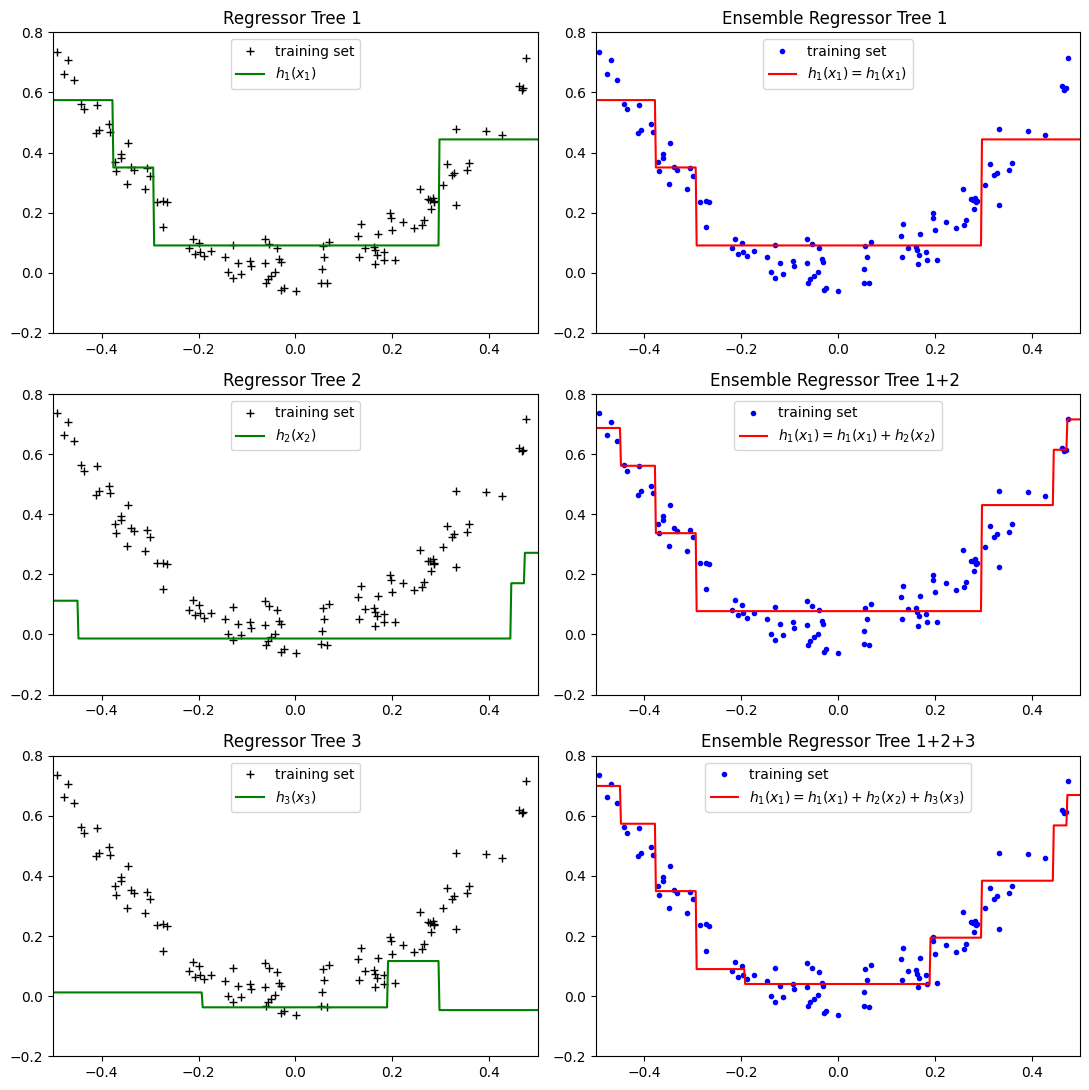

In [91]:
def plot_regressors(x , y , regressors , boundary_style ,
                    data_style , axes , data_label=None , boundary_label =None):
    
    x_new = np.linspace(axes[0] , axes[1] , 500)
    y_pred = sum(tree.predict(x_new.reshape(-1 , 1)) for tree in regressors)
    plt.plot(x[: ,0] , y , data_style , label = data_label)
    plt.plot(x_new ,  y_pred , boundary_style , label = boundary_label)
    if data_label or boundary_label:
        plt.legend(loc="upper center")
    plt.axis(axes)
 
plt.figure(figsize=(11 , 11))   
plt.subplot(3 , 2 , 1)
plot_regressors(x , y , [tree_reg1] , "g-" , 
                "k+" , [-0.5, 0.5, -0.2, 0.8] , data_label="training set" , boundary_label="$h_1(x_1)$")
plt.title("Regressor Tree 1 ")

plt.subplot(3 , 2 , 2)
plot_regressors(x , y , [tree_reg1] , "r-" , 
                "b." , [-0.5, 0.5, -0.2, 0.8] , data_label="training set" , boundary_label="$h_1(x_1) = h_1(x_1)$")
plt.title("Ensemble Regressor Tree 1 ")

plt.subplot(3 , 2 , 3)
plot_regressors(x , y , [tree_reg2] , "g-" , 
                "k+" , [-0.5, 0.5, -0.2, 0.8] , data_label="training set" , boundary_label="$h_2(x_2)$")
plt.title("Regressor Tree 2 ")

plt.subplot(3 , 2 , 4)
plot_regressors(x , y , [tree_reg1 , tree_reg2] , "r-" , 
                "b." , [-0.5, 0.5, -0.2, 0.8] , data_label="training set" , boundary_label="$h_1(x_1) = h_1(x_1) + h_2(x_2)$")
plt.title("Ensemble Regressor Tree 1+2 ")

plt.subplot(3 , 2 , 5)
plot_regressors(x , y , [tree_reg3] , "g-" , 
                "k+" , [-0.5, 0.5, -0.2, 0.8] , data_label="training set" , boundary_label="$h_3(x_3)$")
plt.title("Regressor Tree 3 ")

plt.subplot(3,2,6)
plot_regressors(x , y , [tree_reg1 , tree_reg2 , tree_reg3] , "r-" , 
                "b." , [-0.5, 0.5, -0.2, 0.8] , data_label="training set" , boundary_label="$h_1(x_1)=h_1(x_1) + h_2(x_2) + h_3(x_3)$")
plt.title("Ensemble Regressor Tree 1+2+3")


plt.tight_layout()
plt.show()

In [94]:
gbrt = GradientBoostingRegressor(max_depth=2 , n_estimators=3,
                                 learning_rate=1.0 , random_state=42)
gbrt.fit(x , y)

,loss,'squared_error'
,learning_rate,1.0
,n_estimators,3
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [95]:
gbrt_1 = GradientBoostingRegressor(max_depth=2 , n_estimators=53 ,
                                   learning_rate=0.05 , random_state=42)
gbrt_1.fit(x , y)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,53
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


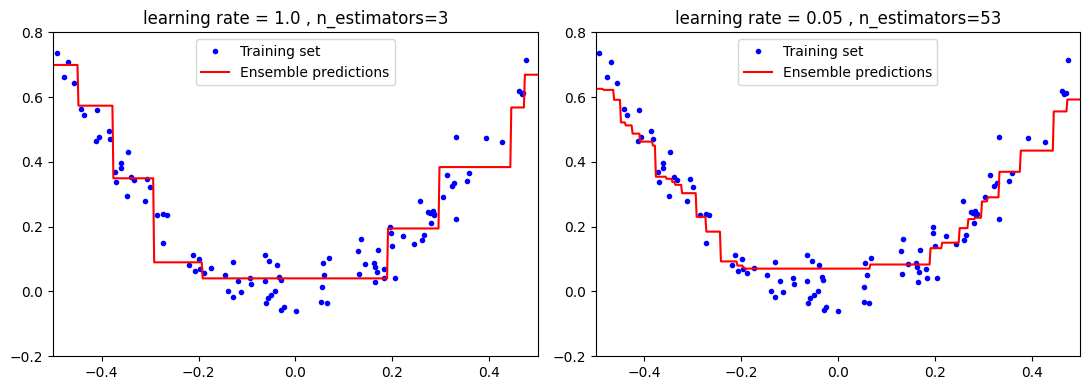

In [98]:
plt.figure(figsize=(11,4))
plt.subplot(1 , 2 , 1)
plot_regressors(x , y , [gbrt] , "r-" , "b." , [-0.5, 0.5, -0.2, 0.8] , "Training set" , "Ensemble predictions")
plt.title("learning rate = 1.0 , n_estimators=3")

plt.subplot(1,2 ,2)
plot_regressors(x , y , [gbrt_1] , "r-" , "b." , [-0.5, 0.5, -0.2, 0.8] , "Training set" , "Ensemble predictions")
plt.title("learning rate = 0.05 , n_estimators=53")

plt.tight_layout()
plt.show()

<h1><b><u>HIST BASED GRADIENT BOOSTING


In [100]:
#pipeline using hsit based gradient boosting for the california dataset

In [102]:
# def load_housing_data():
#     tarball_path = Path("datasets/housing.tgz")
#     if not tarball_path.is_file():
#         Path("datasets").mkdir(parents=True, exist_ok=True)
#         url = "https://github.com/ageron/data/raw/main/housing.tgz"
#         urllib.request.urlretrieve(url, tarball_path)
#         with tarfile.open(tarball_path) as housing_tarball:
#             housing_tarball.extractall(path="datasets")
#     return pd.read_csv(Path("datasets/housing/housing.csv"))

# housing = load_housing_data()

# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# housing_labels = train_set["median_house_value"]
# housing = train_set.drop("median_house_value", axis=1)

In [103]:
# hgb_reg = make_pipeline(
#     make_column_transformer((OrdinalEncoder() , ["ocean_proximity"]),
#                             remainder="passthrough",
#                             force_int_remainder_cols=False),
#     HistGradientBoostingRegressor(categorical_features=[0] , random_state=42)
# )

<h1><b><u>STACKING CLASSIFIER

In [105]:
stacking_clf = StackingClassifier(
    estimators=[
        ('lr' , LogisticRegression(random_state=42)),
        ('rf' , RandomForestClassifier(random_state=42)),
        ('svc',SVC(probability=True , random_state=42))
    ],
    final_estimator = RandomForestClassifier(random_state=42),
    cv=5
)

stacking_clf.fit(x_train , y_train)




,estimators,"[('lr', ...), ('rf', ...), ...]"
,final_estimator,RandomForestC...ndom_state=42)
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [106]:
print(f"{accuracy_score(y_test , stacking_clf.predict(x_test))}")

0.912
